# MLFW Files to PyTorch Ready Data

The WWMR data has been filtered down to square images of faces of the target shape already.

## Imports and info

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
# text document containing list of image files with masks
masks_list_fp = r'D:\data\face_mask\MLFW\mask_list.txt'

img_dir = r'D:\data\face_mask\MLFW\MLFW\aligned'

## Load images as np arrays

First, we need to read the names of the images that have masks.

In [3]:
masks_file = open(masks_list_fp, 'r')

masks_img_names = masks_file.readlines()

# strip newlines
masks_img_names = [file_name.strip() for file_name in masks_img_names]

In [4]:
label_list = []
img_list = []

for root, subdirectories, files in os.walk(img_dir):
    for f in files:
        
        # determine label
        if f in masks_img_names:
            label_list.append(1)
        else:
            label_list.append(0)

        # load image
        im_fp = os.path.join(img_dir, f)
        im = Image.open(im_fp)
        im_arr = np.array(im)
        img_list.append(im_arr)

In [5]:
MLFW_X = np.array(img_list)
MLFW_y = np.array(label_list)

In [7]:
MLFW_X.shape

(12000, 112, 112, 3)

In [8]:
MLFW_y.shape

(12000,)

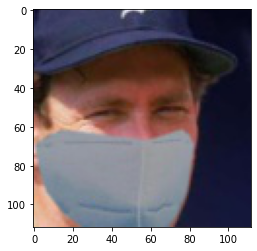

In [9]:
plt.imshow(MLFW_X[200])

In [10]:
out_x = r'D:\data\face_mask\MLFW\MLFW_X'
out_y = r'D:\data\face_mask\MLFW\MLFW_y'

np.save(out_x, MLFW_X)
np.save(out_y, MLFW_y)